In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

# Вывод формулы $E(N_t|N_s)$ 

Воспользуемся линейностью условного матожидания: <br>

$E(N_t|N_s) = E([N_t-N_s]|N_s) + E(N_s|N_s) =  E([N_t-N_s]|N_s) + N_s$ <br>

Известно что <br>
$ (N_t-N_s) \sim Pois(\lambda(t-s))$ <br>
$ (N_t-N_s)$ независимо c $N_s$ <br>

Значит, $E(N_t|N_s) = E(N_t-N_s) + N_s = \lambda (t-s) + N_s$

In [2]:
# данные из файла
lambda_ = 1/95
t_0 = 500
t = 100000

data = np.loadtxt('6.csv.xls', delimiter=',', skiprows=3)

In [3]:
# функция вычисляет действительное количество вышедших из строя серверов
# к моменту времени t, по данным из файла
def count_real_num(t):
    return np.sum(data <= t)

In [4]:
reality = []      # реальное число вышедших из строя серверов
prediction = []   # предсказанное число вышедших из строя серверов
time = np.arange(0, t+t_0, t_0)

for s in time:
    reality.append(count_real_num(s))
    prediction.append(count_real_num(s) + lambda_*(t-s))

Вычислили реальное значение поломанных серверов для каждого момента времени из промежутка $[0;t]$ кратного $t_0$, а также значения предсказания числа поломанных серверов к моменту $t$. <br>
К моменту времени $t$ из строя выйдет 1000 серверов. Отобразим на графике зависимость предсказания от времени, а также реальное сломанных серверов на момент $t$.

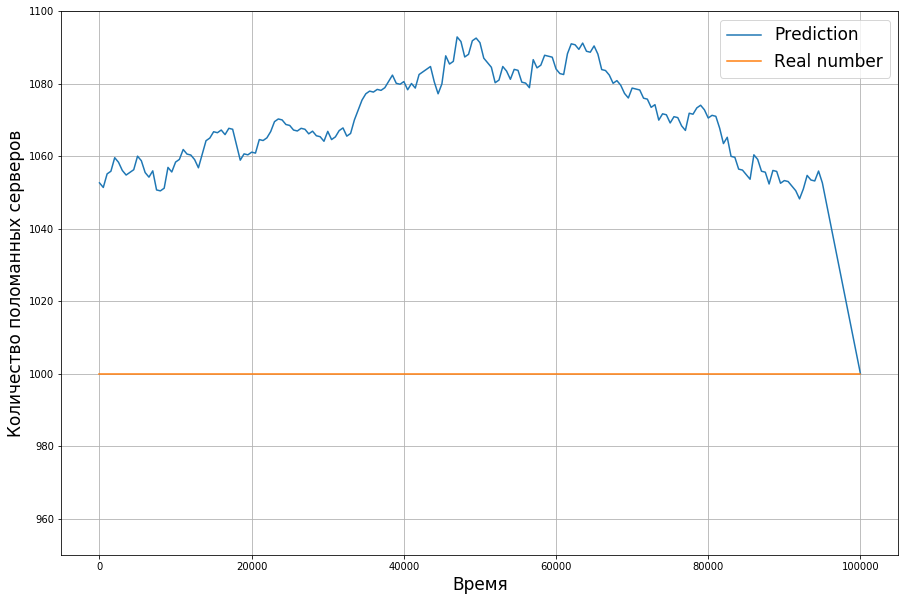

In [8]:
plt.figure(figsize=(15,10))
plt.plot(time, prediction, label='Prediction')
plt.plot(time, [1000 for i in range(len(time))], label='Real number')
plt.ylim((950, 1100))
plt.ylabel("Количество поломанных серверов", fontsize=17)
plt.xlabel("Время", fontsize=17)
plt.legend(fontsize=17)
plt.grid() 
plt.show()

In [6]:
for i in range(time.size):
    print ("Время = %d : количество серверов = %d" % (time[i], prediction[i]))

Время = 0 : количество серверов = 1052
Время = 500 : количество серверов = 1051
Время = 1000 : количество серверов = 1055
Время = 1500 : количество серверов = 1055
Время = 2000 : количество серверов = 1059
Время = 2500 : количество серверов = 1058
Время = 3000 : количество серверов = 1056
Время = 3500 : количество серверов = 1054
Время = 4000 : количество серверов = 1055
Время = 4500 : количество серверов = 1056
Время = 5000 : количество серверов = 1060
Время = 5500 : количество серверов = 1058
Время = 6000 : количество серверов = 1055
Время = 6500 : количество серверов = 1054
Время = 7000 : количество серверов = 1055
Время = 7500 : количество серверов = 1050
Время = 8000 : количество серверов = 1050
Время = 8500 : количество серверов = 1051
Время = 9000 : количество серверов = 1056
Время = 9500 : количество серверов = 1055
Время = 10000 : количество серверов = 1058
Время = 10500 : количество серверов = 1059
Время = 11000 : количество серверов = 1061
Время = 11500 : количество серверов

# Вывод:

Была вычисленна оценка количества серверов, которые потребуется купить к моменту времени $t$. <br>